# Execicio

In [5]:
import geopandas as gpd
import os
import matplotlib

In [13]:
path = os.getcwd()+'\\dados\\municipios.shp'
path
dados = gpd.read_file(path)
dados

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
0,1,1,5100102,Acorizal,MT,Centro-Oeste,None,"POLYGON ((-56.28986 -15.23886, -56.28991 -15.2..."
1,2,104,5107156,Reserva Do Cabaçal,MT,Centro-Oeste,None,"POLYGON ((-58.50758 -15.00500, -58.72273 -15.0..."
2,3,144,5200100,Abadiânia,GO,Centro-Oeste,None,"POLYGON ((-48.91412 -16.08702, -48.91283 -16.0..."
3,4,147,5200175,Água Fria De Goiás,GO,Centro-Oeste,None,"POLYGON ((-47.85740 -14.76522, -47.85657 -14.7..."
4,5,160,5201306,Anicuns,GO,Centro-Oeste,None,"POLYGON ((-49.98332 -16.32660, -49.98259 -16.3..."
...,...,...,...,...,...,...,...,...
6124,6125,6120,4128401,Uraí,PR,Sul,None,"POLYGON ((-50.89000 -23.14711, -50.87139 -23.1..."
6125,6126,6121,4128500,Wenceslau Braz,PR,Sul,None,"POLYGON ((-49.79156 -23.73905, -49.79150 -23.7..."
6126,6127,6123,4128559,Vera Cruz Do Oeste,PR,Sul,None,"POLYGON ((-53.87662 -24.99329, -53.87627 -24.9..."
6127,6128,6125,4128625,Alto Paraíso,PR,Sul,None,"POLYGON ((-53.79019 -23.37994, -53.78410 -23.3..."


In [15]:
dados.head()

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
0,1,1,5100102,Acorizal,MT,Centro-Oeste,None,"POLYGON ((-56.28986 -15.23886, -56.28991 -15.2..."
1,2,104,5107156,Reserva Do Cabaçal,MT,Centro-Oeste,None,"POLYGON ((-58.50758 -15.00500, -58.72273 -15.0..."
2,3,144,5200100,Abadiânia,GO,Centro-Oeste,None,"POLYGON ((-48.91412 -16.08702, -48.91283 -16.0..."
3,4,147,5200175,Água Fria De Goiás,GO,Centro-Oeste,None,"POLYGON ((-47.85740 -14.76522, -47.85657 -14.7..."
4,5,160,5201306,Anicuns,GO,Centro-Oeste,None,"POLYGON ((-49.98332 -16.32660, -49.98259 -16.3..."


<Axes: >

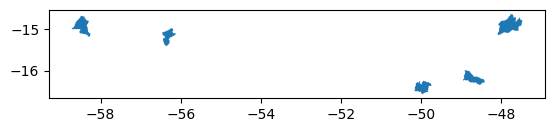

In [19]:
dados[:5].plot()

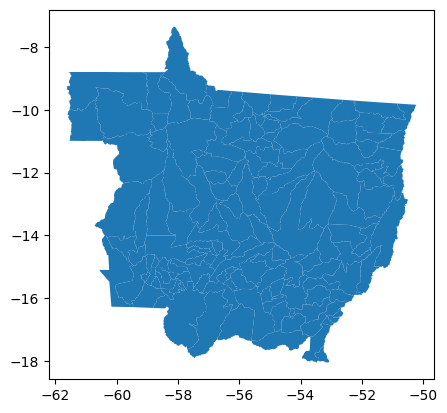

In [28]:
filtro_MT = dados['uf']=='MT'
municipios_mt=dados.loc[filtro_MT]
municipios_mt.plot()
municipios_mt.to_file(os.getcwd()+'\\dados\\municipios_mt.shp')

In [33]:
municipios_filtrado = gpd.read_file(os.getcwd()+'\\dados\\municipios_mt.shp')
municipios_filtrado

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
0,1,1,5100102,Acorizal,MT,Centro-Oeste,None,"POLYGON ((-56.28986 -15.23886, -56.28991 -15.2..."
1,2,104,5107156,Reserva Do Cabaçal,MT,Centro-Oeste,None,"POLYGON ((-58.50758 -15.00500, -58.72273 -15.0..."
2,1844,50,5104203,Guiratinga,MT,Centro-Oeste,None,"POLYGON ((-53.39519 -16.25179, -53.39311 -16.2..."
3,1905,100,5107008,Poxoréo,MT,Centro-Oeste,None,"POLYGON ((-54.12541 -15.62666, -54.11696 -15.6..."
4,1849,84,5106273,Novo Horizonte Do Norte,MT,Centro-Oeste,None,"POLYGON ((-57.35716 -11.52347, -57.35867 -11.5..."
...,...,...,...,...,...,...,...,...
137,2163,126,5107909,Sinop,MT,Centro-Oeste,None,"POLYGON ((-55.78527 -11.45718, -55.78211 -11.4..."
138,2164,127,5107925,Sorriso,MT,Centro-Oeste,None,"POLYGON ((-55.58142 -13.31143, -55.58139 -13.3..."
139,2165,128,5107941,Tabaporã,MT,Centro-Oeste,None,"POLYGON ((-57.00643 -11.37490, -57.01319 -11.3..."
140,2166,139,5108808,Nova Guarita,MT,Centro-Oeste,None,"POLYGON ((-55.43940 -10.39060, -55.43933 -10.3..."


In [36]:
municipios_filtrado['area']=municipios_filtrado['geometry'].area
municipios_filtrado

C:\Users\eduar\AppData\Local\Temp\ipykernel_21372\1257279666.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  municipios_filtrado['area']=municipios_filtrado['geometry'].area


,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
0,1,1,5100102,Acorizal,MT,Centro-Oeste,0.070693,"POLYGON ((-56.28986 -15.23886, -56.28991 -15.2..."
1,2,104,5107156,Reserva Do Cabaçal,MT,Centro-Oeste,0.112314,"POLYGON ((-58.50758 -15.00500, -58.72273 -15.0..."
2,1844,50,5104203,Guiratinga,MT,Centro-Oeste,0.428165,"POLYGON ((-53.39519 -16.25179, -53.39311 -16.2..."
3,1905,100,5107008,Poxoréo,MT,Centro-Oeste,0.582975,"POLYGON ((-54.12541 -15.62666, -54.11696 -15.6..."
4,1849,84,5106273,Novo Horizonte Do Norte,MT,Centro-Oeste,0.072863,"POLYGON ((-57.35716 -11.52347, -57.35867 -11.5..."
...,...,...,...,...,...,...,...,...
137,2163,126,5107909,Sinop,MT,Centro-Oeste,0.326899,"POLYGON ((-55.78527 -11.45718, -55.78211 -11.4..."
138,2164,127,5107925,Sorriso,MT,Centro-Oeste,0.776605,"POLYGON ((-55.58142 -13.31143, -55.58139 -13.3..."
139,2165,128,5107941,Tabaporã,MT,Centro-Oeste,0.688512,"POLYGON ((-57.00643 -11.37490, -57.01319 -11.3..."
140,2166,139,5108808,Nova Guarita,MT,Centro-Oeste,0.091949,"POLYGON ((-55.43940 -10.39060, -55.43933 -10.3..."


In [38]:
import numpy as np

In [42]:
municipios_filtrado['classe'] = np.where(municipios_filtrado['area']>0.1,1,0)
municipios_filtrado


,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry,classe
0,1,1,5100102,Acorizal,MT,Centro-Oeste,0.070693,"POLYGON ((-56.28986 -15.23886, -56.28991 -15.2...",0
1,2,104,5107156,Reserva Do Cabaçal,MT,Centro-Oeste,0.112314,"POLYGON ((-58.50758 -15.00500, -58.72273 -15.0...",1
2,1844,50,5104203,Guiratinga,MT,Centro-Oeste,0.428165,"POLYGON ((-53.39519 -16.25179, -53.39311 -16.2...",1
3,1905,100,5107008,Poxoréo,MT,Centro-Oeste,0.582975,"POLYGON ((-54.12541 -15.62666, -54.11696 -15.6...",1
4,1849,84,5106273,Novo Horizonte Do Norte,MT,Centro-Oeste,0.072863,"POLYGON ((-57.35716 -11.52347, -57.35867 -11.5...",0
...,...,...,...,...,...,...,...,...,...
137,2163,126,5107909,Sinop,MT,Centro-Oeste,0.326899,"POLYGON ((-55.78527 -11.45718, -55.78211 -11.4...",1
138,2164,127,5107925,Sorriso,MT,Centro-Oeste,0.776605,"POLYGON ((-55.58142 -13.31143, -55.58139 -13.3...",1
139,2165,128,5107941,Tabaporã,MT,Centro-Oeste,0.688512,"POLYGON ((-57.00643 -11.37490, -57.01319 -11.3...",1
140,2166,139,5108808,Nova Guarita,MT,Centro-Oeste,0.091949,"POLYGON ((-55.43940 -10.39060, -55.43933 -10.3...",0


In [44]:
municipios_filtrado.to_file(os.getcwd()+'\\dados\\municipios_mt.shp')

In [99]:
municipios = gpd.read_file(os.getcwd()+'\\dados\\municipios_mt.shp')

In [100]:
municipios = municipios.set_crs(epsg=4674,allow_override=True)

In [101]:
municipios.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [114]:
municipio_crs = municipios.to_crs(epsg=31981)

In [116]:
municipio_crs.crs

<Derived Projected CRS: EPSG:31981>
Name: SIRGAS 2000 / UTM zone 21S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 60°W and 54°W, northern and southern hemispheres. In remainder of South America - between 60°W and 54°W, southern hemisphere, onshore and offshore.
- bounds: (-60.0, -44.82, -54.0, 4.51)
Coordinate Operation:
- name: UTM zone 21S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [118]:
municipio_crs.area/10000

0       84001.815473
1      133678.913294
2      507438.564006
3      691982.796707
4       87901.326381
           ...      
137    394166.638894
138    932706.268570
139    831166.357497
140    111409.897295
141    193830.251778
Length: 142, dtype: float64